In [410]:
#Importing stuff
import os
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from scipy import signal
import BehaviorFunctions as beh

#Finding the list of folders with data
%run '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/notebooks/00_manuscript/BehaviorFunctions.py'
Path_Files = '/n/hoekstra_lab_tier1/Users/mwoolfolk/BW/'
#Path_Files=r'C:/Users/jisan/Documents/Data/Playbacks/'
#Path_Files=r'/Volumes/hoekstra_lab/Users/mwoolfolk/BW/'

SessionsToRun = [f for f in os.listdir(Path_Files) if f.startswith('BW')]# if f.endswith('.' + 'csv') if f.startswith('')]

print(SessionsToRun)

['BW_f_29483_2022_7_15', 'BW_f_28988_2022_3_16', 'BW_f_29916_2022_2_23', 'BW_f_29915_2022_3_03', 'BW_f_31922_2022_3_01']


In [428]:
# Loading certain Session
# Example is the session to be loaded
Example=4
ExampleSessionCentroid=  [f for f in os.listdir(Path_Files+SessionsToRun[Example]) if f.startswith('centroid')] 
ExampleSessionTTL= [f for f in os.listdir(Path_Files+SessionsToRun[Example]) if f.startswith('Playback_TTL')] 
tracking=np.genfromtxt([Path_Files+SessionsToRun[Example]+ '/'  +ExampleSessionCentroid[0]][0], delimiter=',')
TTL=np.genfromtxt([Path_Files+SessionsToRun[Example]+ '/' +ExampleSessionTTL[0]][0], delimiter=',')
#Behaviors=np.genfromtxt('C:/Users/jisan/Documents/Data/Playbacks/BW_f_28988_2022_3_16/Behaviors2022-03-16T16_03_39.csv', delimiter=',')


#Rescaling from pixels to cm
Scale=8.8
tracking=tracking/Scale
#print(tracking[:,0])
#print(np.nanpercentile(tracking[:,0], 10))
# tracking[:,0]=tracking[:,0]-np.nanpercentile(tracking[:,0],1)
# tracking[:,1]=tracking[ :,1]-np.nanpercentile(tracking[:,1],1)
# print(np.size(tracking,0))
# print(np.size(TTL))


if np.size(tracking,0)!=np.size(TTL):
    minimum=np.min([np.size(tracking,0),np.size(TTL)])
    TTL=TTL[0:minimum]
    tracking=tracking[0:minimum,:]
    print(minimum)



# print(np.size(tracking,0))
# print(np.size(TTL))
# print(TTL)
#print(tracking)
# print([Path_Files+SessionsToRun[Example]+ '/'  +ExampleSessionCentroid[0]])
# print(ExampleSessionCentroid)



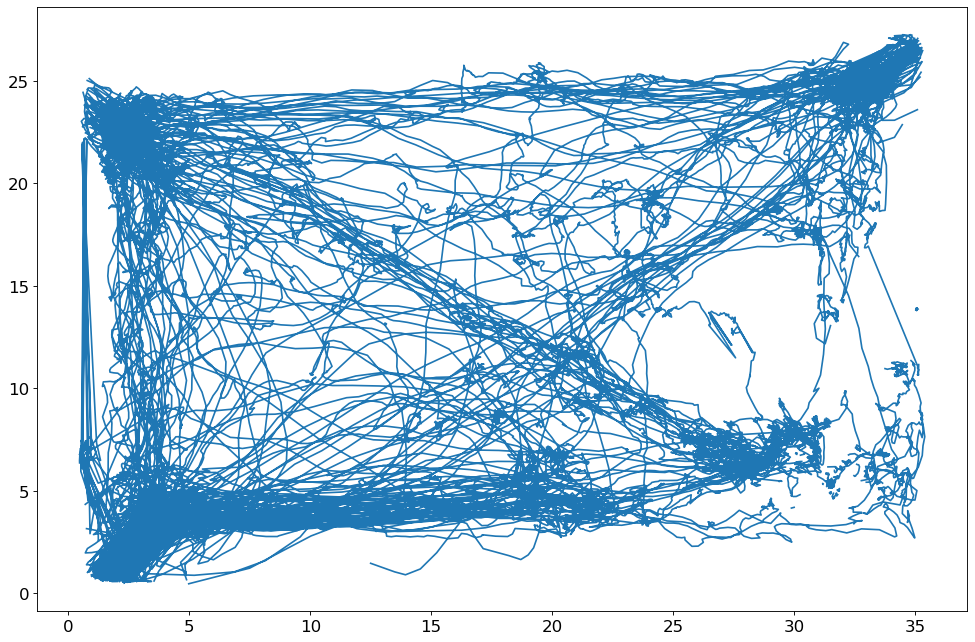

In [429]:

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(tracking[:,0], tracking[:,1])


#plt.show()

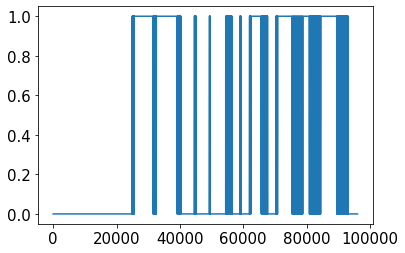

In [430]:
# Threshold and redefine TTL
TTL[:]=TTL>1
plt.plot(TTL[:])

#plt.show()

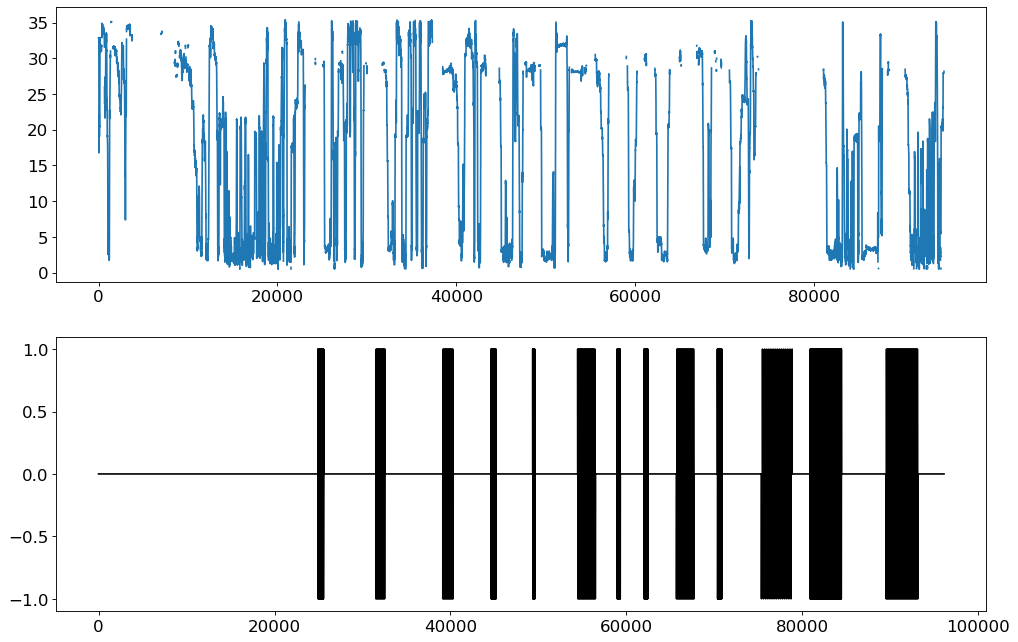

In [431]:
#Define DiffTTL

DiffTTL= np.diff(TTL)

DiffTTL=np.append(DiffTTL,DiffTTL[-1])


figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2,1,1)

plt.plot(tracking[:,0])
plt.subplot(2,1,2)
plt.plot(DiffTTL[:], 'k')

#plt.show()

In [432]:
#Analyzing the TTL flips

HighFlips=np.where(DiffTTL>0.5)
# print(np.size(HighFlips))
# print(HighFlips[0])

DiffFlips=np.diff(HighFlips)

DiffFlips=np.append(DiffFlips[0],DiffFlips[0][-1])
#print(np.size(DiffFlips))



# plt.plot(DiffFlips)
# plt.ylim([0, 100])

In [433]:
CryFlips=( DiffFlips> 28) & (DiffFlips < 32)
WhistleFlips=( DiffFlips> 88) & (DiffFlips < 92)
EndFlips=( DiffFlips> 95)
allVector=np.arange(0,np.size(TTL,0),1)
AllCry=np.interp(allVector, HighFlips[0], CryFlips)
AllWhistle=np.interp(allVector, HighFlips[0], WhistleFlips)
# print(CryFlips)
# print(AllCry)
# print(AllWhistle)

#plt.plot(AllCry, '.k')

In [434]:
AllWhistle[allVector<HighFlips[0][0]]=False

AllCry[allVector<HighFlips[0][0]]=False

AllWhistle[allVector>HighFlips[0][-1]]=False

AllCry[allVector>HighFlips[0][-1]]=False


#plt.plot(AllWhistle, '.k')

In [435]:
# print(np.size(CryFlips))
# print(np.size(HighFlips[0][CryFlips]))

#print(np.size(HighFlips[0]))

# print((CryFlips))
# print((HighFlips[0][CryFlips]))


# print(np.size(AllCry))

# print(EndFlips)

AllCrybool=AllCry==1
AllWhistlebool=AllWhistle==1
# plt.show()
# plt.plot(AllCrybool)
# plt.plot(AllWhistlebool, 'r')
# plt.plot(AllWhistle, 'g')

#plt.show()

#plt.plot(CryFlips, '.k')
#plt.plot(WhistleFlips, '.r')

# print(HighFlips)
# print(WhistleFlips)

In [436]:

# print(HighFlips)

# print(np.size(HighFlips))
# print(np.size(WhistleFlips))
# print(WhistleFlips)

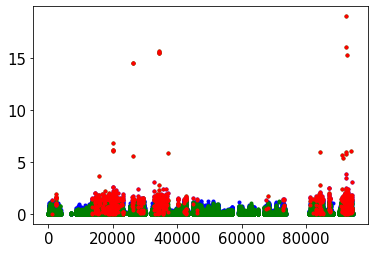

In [437]:
#Removing jumps in tracking and interpolating tracking
diffX=np.diff(tracking[:,0])
diffY=np.diff(tracking[:,1])

diffX=np.append(diffX,diffX[-1])
diffY=np.append(diffY,diffY[-1])

plt.plot (np.abs(diffX), '.b')
plt.plot (np.abs(diffY), '.g')

EraseX=np.where(np.abs(diffX)>1.3)
EraseY=np.where(np.abs(diffY)>1.3)
#print(EraseY)
#print(EraseX)
Erase=np.append(EraseX, EraseY)

Erase=np.unique(Erase)
#print(Erase)
#print(Erase)

plt.plot(Erase,np.abs(diffX[Erase]), '.r')
plt.plot(Erase,np.abs(diffY[Erase]), '.r')
plt.show()
#print(np.abs(diffX[Erase]))





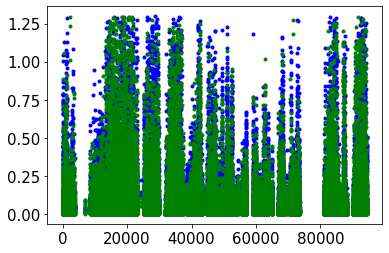

In [438]:
#Erasing outliers

tracking[Erase,:] = np.NAN

diffX=np.diff(tracking[:,0])
diffY=np.diff(tracking[:,1])

diffX=np.append(diffX,diffX[-1])
diffY=np.append(diffY,diffY[-1])

plt.plot (np.abs(diffX), '.b')
plt.plot (np.abs(diffY), '.g')


In [439]:
#interpolating nans

NaNIndexes=np.where(np.isnan(tracking[:,0]))
# print(np.shape(NaNIndexes[0]))
# print(np.where(~np.isnan(tracking[:,0])))

# print(np.shape(np.where(~np.isnan(tracking[:,0]))))
# print(np.shape(tracking[np.where(~np.isnan(tracking[:,0])),0][0]))
# print(tracking[np.where(~np.isnan(tracking[:,0])),0][0])
tracking[NaNIndexes,0]=np.interp(NaNIndexes[0],np.where(~np.isnan(tracking[:,0]))[0],tracking[np.where(~np.isnan(tracking[:,0])),0][0])
tracking[NaNIndexes,1]=np.interp(NaNIndexes[0],np.where(~np.isnan(tracking[:,1]))[0],tracking[np.where(~np.isnan(tracking[:,1])),1][0])

In [440]:
# figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

# plt.plot(tracking[10000:100000,0], tracking[10000:100000,1], '.-b')

# plt.show()

# plt.figure()
# plt.plot(tracking[:,0])

#plt.show()

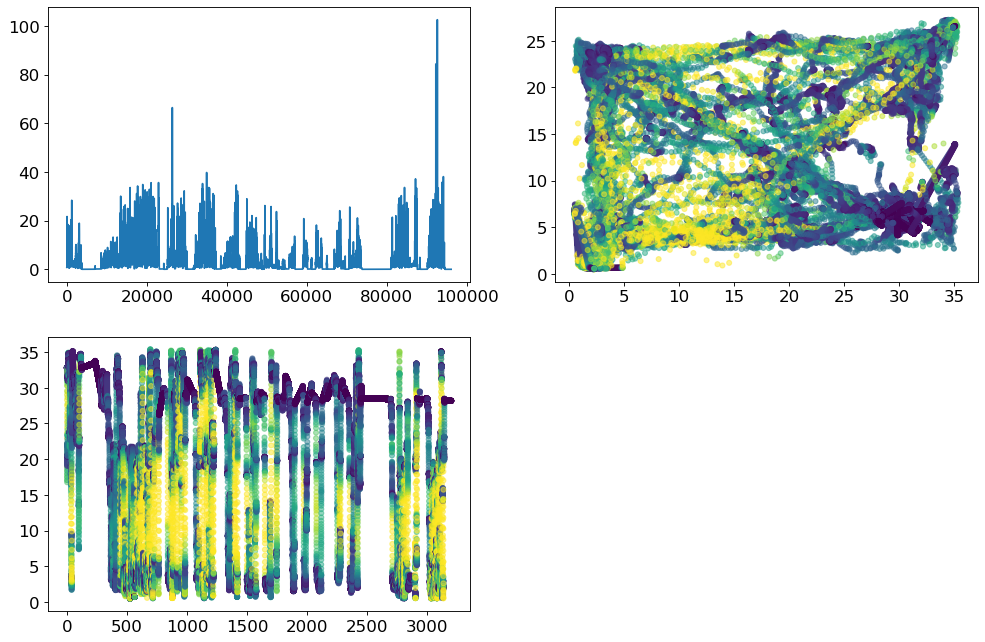

In [441]:
def CalcSpeed(DistanceXY, Framerate):

    Speed= np.sqrt( np.square(np.diff(DistanceXY[:,0])) + np.square(np.diff(DistanceXY[:,1])))/(1/Framerate)
    return Speed

TimeVector=np.arange(0,0.0333*np.size(TTL,0),0.0333)
Speedpre=CalcSpeed(tracking, 30)
Speedpre=np.append(Speedpre,Speedpre[-1])



# def gaussian_filter1d(size,sigma):
#     filter_range = np.linspace(-int(size/2),int(size/2),size)
#     gaussian_filter = [1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-x**2/(2*sigma**2)) for x in filter_range]
#     return gaussian_filter


Filter=gaussian_filter_1d(size=60,sigma=sigma1)
Speed=np.convolve(Speedpre, Filter, 'same')


figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.plot(Speed)
plt.subplot(2,2,2)
plt.scatter( tracking[:,0], tracking[:,1], c=Speed, s=20, alpha=0.5,  vmin=0, vmax=20)

plt.subplot(2,2,3)
plt.scatter( TimeVector, tracking[:,0],c=Speed, s=20, alpha=0.5,  vmin=0, vmax=20)

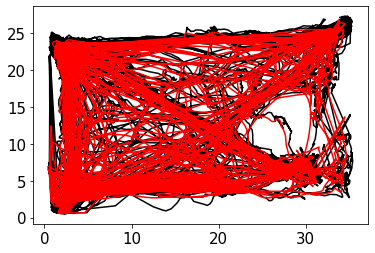

In [442]:
# Filtering the position of X and Y 
sigma1 = 5

plt.plot(tracking[:,0], tracking[:,1], 'k')
Filter=gaussian_filter_1d(size=60,sigma=sigma1)
tracking[:,0]=np.convolve(tracking[:,0], Filter, 'same')
tracking[:,1]=np.convolve(tracking[:,1], Filter, 'same')

plt.plot(tracking[:,0], tracking[:,1], 'r')


In [443]:
# print(np.shape(tracking))
# print(np.shape(AllCrybool))
# print(AllCrybool)
# AllCrybool[0:75000][:]

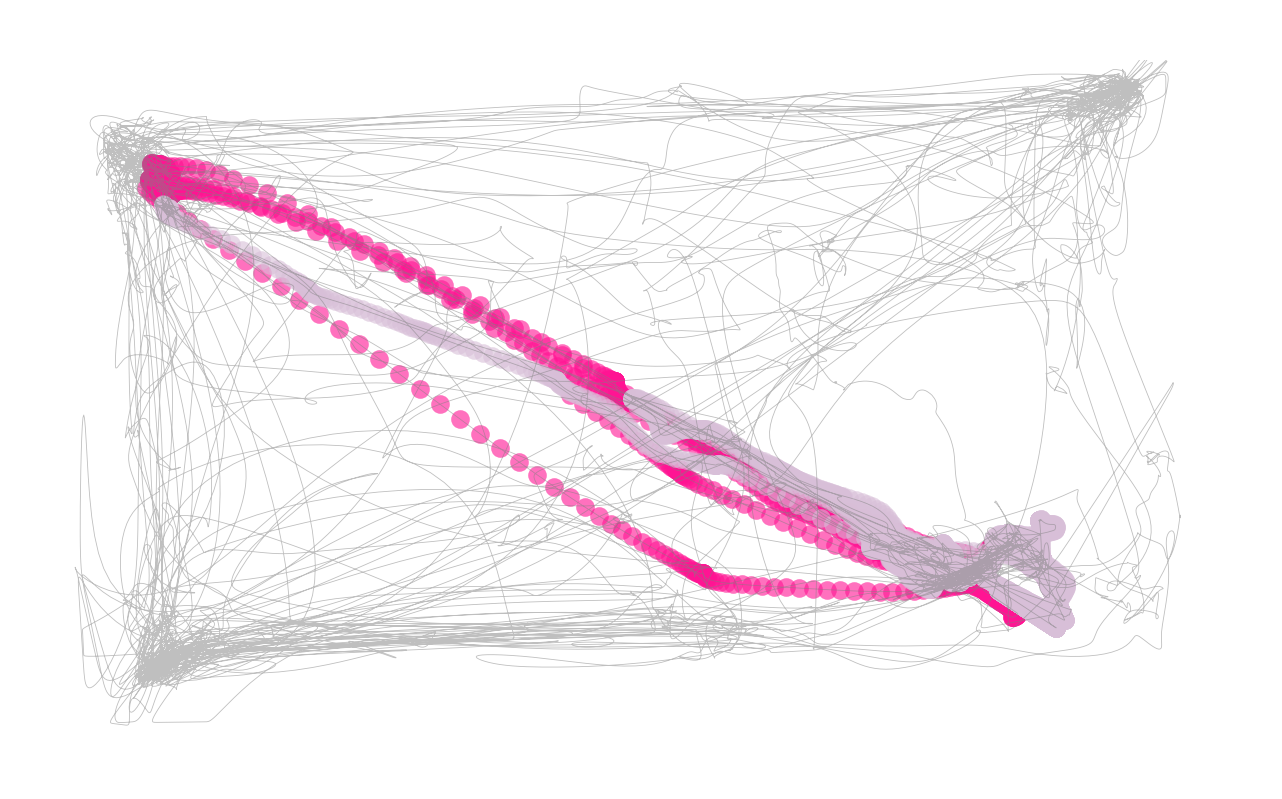

In [447]:

save = True

plt.figure(figsize = [2.5,1.5], dpi = 600)

no_playback_alpha = .5
playback_alpha = .6
no_playback_s = 2.5
playback_s = 5
fontsize = 9

#Plotting all tracking and differentially tracking under Cry or Whistle
#print(HighFlips[0][CryFlips])
plt.plot( tracking[0:75000,0], 
            tracking[0:75000,1], 
            color='grey', 
            alpha=no_playback_alpha, linewidth=.1)

AllCryIndex=np.where(AllCrybool[0:75000]==True)
AllWhistleIndex=np.where(AllWhistlebool[0:75000]==True)



plt.scatter(tracking[AllCryIndex,0], 
            tracking[AllCryIndex,1], 
            color='deeppink', 
            alpha = playback_alpha, 
            s = playback_s, 
            linewidth=0)

plt.scatter(tracking[AllWhistleIndex,0], 
            tracking[AllWhistleIndex,1], 
            color='thistle', 
            alpha = playback_alpha, 
            linewidth=0,
            s = playback_s)

plt.xlabel('X position (cm)', fontname="Arial", fontsize=fontsize)
plt.ylabel('Y position (cm)',  fontname="Arial", fontsize=fontsize)

plt.xlim(0,36)
plt.ylim(0,26)

plt.xlabel('')
plt.ylabel('')

plt.xticks([],[])
plt.yticks([],[])

plt.axis('off')
sns.despine()
#plt.plot(tracking[HighFlips[0][EndFlips],0], tracking[HighFlips[0][EndFlips],1], '.m' )

if save:
    save_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/figures/figure_3/'
    save_name = 'dam_5_example_position_plot_v2.jpeg'
    plt.savefig(os.path.join(save_dir,save_name), bbox_inches = 'tight', dpi=600)


In [408]:
AllCryIndex

(array([24786, 24787, 24788, ..., 64790, 64791, 64792]),)

(0.0, 26.0)

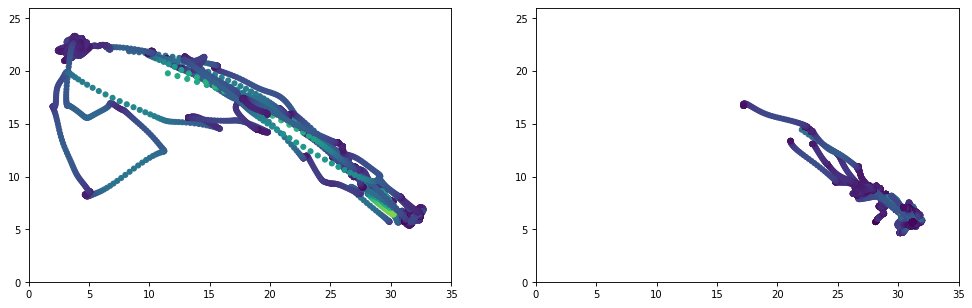

In [392]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')


plt.subplot(2,2,1)


plt.scatter( tracking[AllCrybool,0], tracking[AllCrybool,1], c=Speed[AllCrybool], s=20, alpha=1,  vmin=0, vmax=30)
plt.xlim([0, 35])
plt.ylim([0, 26])
plt.subplot(2,2,2)
plt.scatter( tracking[AllWhistlebool,0], tracking[AllWhistlebool,1], c=Speed[AllWhistlebool], s=20, alpha=1,  vmin=0, vmax=30)
plt.xlim([0, 35])
plt.ylim([0, 26])

120038
120038
120038


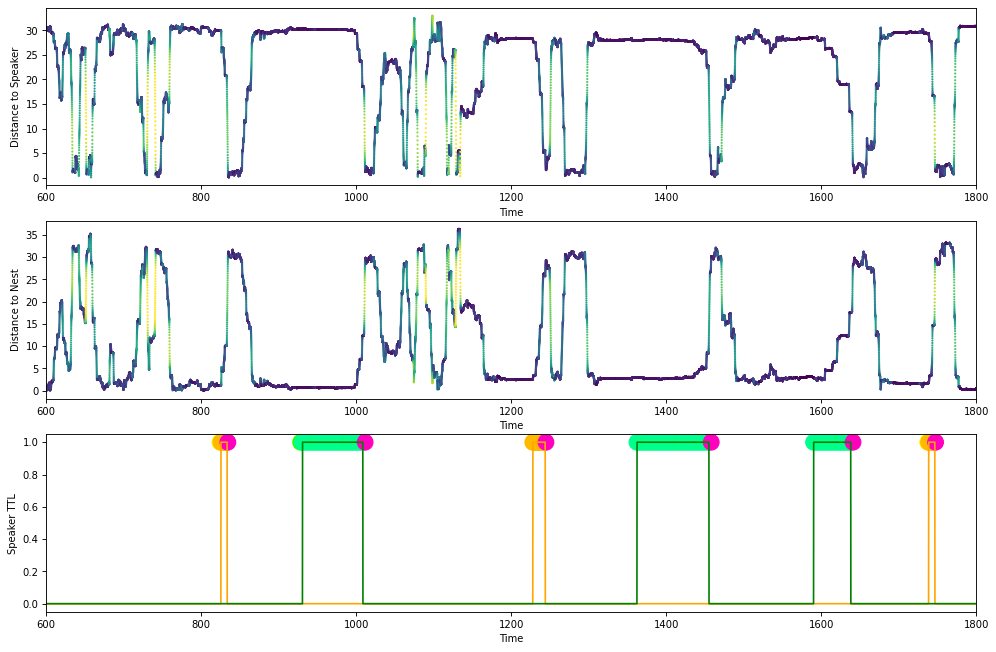

In [393]:
Begin=17000
Ending=60000

DiffTTL= np.diff(TTL)

DiffTTL=np.append(DiffTTL,DiffTTL[-1])

DistanceMouseSpeaker=beh.CalcDistance(tracking[:,0], tracking[:,1], 5, 22.5)
DistanceMouseNest=beh.CalcDistance(tracking[:,0], tracking[:,1], 31, 6)

print(np.size(DistanceMouseSpeaker))
print(np.size(DistanceMouseNest))
print(np.size(DiffTTL))

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3,1,1)

plt.scatter( TimeVector[Begin:Ending], DistanceMouseSpeaker[Begin:Ending],c=Speed[Begin:Ending], s=1, alpha=0.9,  vmin=0, vmax=20)
plt.xlabel('Time')
plt.ylabel('Distance to Speaker')
plt.xlim([600, 1800])
plt.subplot(3,1,2)
plt.scatter( TimeVector[Begin:Ending], DistanceMouseNest[Begin:Ending],c=Speed[Begin:Ending], s=1, alpha=0.9,  vmin=0, vmax=20)
plt.xlabel('Time')
plt.ylabel('Distance to Nest')
plt.xlim([600, 1800])
plt.subplot(3,1,3)
#plt.plot(TimeVector[Begin:Ending], DiffTTL[Begin:Ending], 'k' )
plt.scatter(TimeVector[HighFlips], DiffTTL[HighFlips],c=DiffFlips, s=200, alpha=1, vmin=0, vmax=180 , cmap='gist_rainbow')
plt.plot(TimeVector, AllCrybool, color='orange')
plt.plot(TimeVector, AllWhistlebool, color='green')
plt.xlabel('Time')
plt.ylabel('Speaker TTL')
plt.xlim([600, 1800])
plt.show()

120038
120038
120038


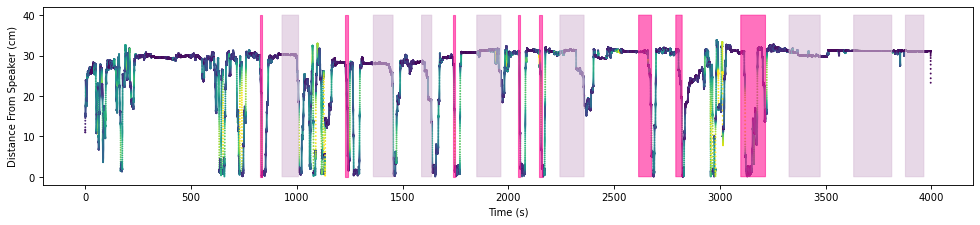

In [394]:
Begin=0
Ending=np.size(TTL,0)

DiffTTL= np.diff(TTL)

DiffTTL=np.append(DiffTTL,DiffTTL[-1])

DistanceMouseSpeaker=beh.CalcDistance(tracking[:,0], tracking[:,1], 5, 22.5)
DistanceMouseNest=beh.CalcDistance(tracking[:,0], tracking[:,1], 31, 6)

print(np.size(DistanceMouseSpeaker))
print(np.size(DistanceMouseNest))
print(np.size(DiffTTL))

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

ax= plt.subplot(3,1,1)

#plt.scatter( TimeVector[Begin:Ending], DistanceMouseSpeaker[Begin:Ending],c=Speed[Begin:Ending], s=20, alpha=0.5,  vmin=0, vmax=20)
# plt.plot( TimeVector[Begin:Ending], DistanceMouseSpeaker[Begin:Ending] ,color="black", linewidth=0.5)
# plt.xlabel('Time')
# plt.ylabel('Distance to Speaker')
plt.scatter( TimeVector[Begin:Ending], DistanceMouseSpeaker[Begin:Ending],c=Speed[Begin:Ending], s=.5, alpha=1,  vmin=0, vmax=20)
plt.xlabel('Time')
plt.ylabel('Distance to Speaker')


#plt.xlim([600, 1800])
#plt.plot(TimeVector[Begin:Ending], DiffTTL[Begin:Ending], 'k' )
#plt.scatter(TimeVector[HighFlips], DiffTTL[HighFlips],c=DiffFlips, s=200, alpha=1, vmin=0, vmax=180 , cmap='gist_rainbow')

ax.fill_between(TimeVector,0,40, where=AllCrybool,  alpha=0.6, color='deeppink')
ax.fill_between(TimeVector,0,40, where=AllWhistlebool,  alpha=0.6, color='thistle')
plt.xlabel('Time (s)')
plt.ylabel('Distance From Speaker (cm)')
plt.rcParams.update({'font.size': 15})
#plt.xlim([1200, 1400])
plt.show()

7801


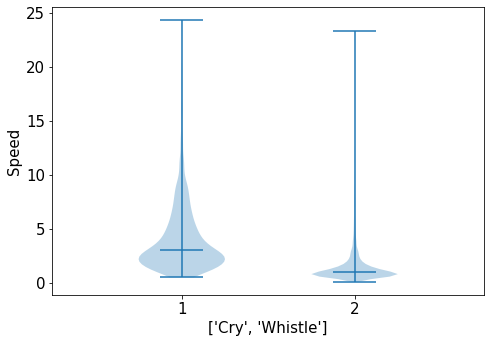

[[3.541318942036755, 3.8501562753683674, 4.188773072218978, 4.543364656731636, 4.926187200738712, 5.332862787588013, 5.760577617783724, 6.206784807940751, 6.670693421480376, 7.141498478904044, 7.615891198287828, 8.094822874967461, 8.563493131876541, 9.017197318531434, 9.450583012914146, 9.855622911850656, 10.222962633649267, 10.547887068246512, 10.82460512812337, 11.049514805135214, 11.217446615929179, 11.325534738211656, 11.374544820873483, 11.362484623193296, 11.293232459561066, 11.168131991173942, 10.988244213450676, 10.759916280401193, 10.49041949237251, 10.182821187375932, 9.84811126855468, 9.489714918123939, 9.118132515569126, 8.735850339550318, 8.353773785420497, 7.9752990439374045, 7.600202129295441, 7.2412566556028635, 6.908058383142149, 6.594079599316705, 6.304162746198297, 6.041917577960333, 5.805782858818433, 5.598086982423161, 5.421555301461226, 5.272607821723032, 5.136325446656518, 5.043402603789416, 4.965510936174512, 4.912161323526165, 4.8733009117486406, 4.849450322496

In [395]:

SpeedCryMedian=np.median(Speed[AllCrybool])
SpeedWhistleMedian=np.median(Speed[AllWhistlebool])

## combine these different collections into a list

SpeeCry=Speed[AllCrybool][~np.isnan(Speed[AllCrybool])]
SpeeWhis=Speed[AllWhistlebool][~np.isnan(Speed[AllWhistlebool])]
SpeeCry.tolist()
SpeeWhis.tolist()
data_to_plot = [SpeeCry.tolist(), SpeeWhis.tolist()]

print(np.size(Speed[AllCrybool]))



ax.set_xlabel('Sample name')

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
ax.violinplot(data_to_plot,
                   showmeans=False, showmedians=True, showextrema=True)
# plt.ylim([0,200])
# plt.xlim([0,6])
labels2 = ['Cry', 'Whistle']
ax.xaxis.set_tick_params(direction='out')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(np.arange(1, len(labels2) + 1))
ax.set_xlim(0.25, len(labels2) + 0.75)
ax.set_xlabel(['Cry', 'Whistle'])
plt.ylabel('Speed')
plt.show()
print(data_to_plot)


Text(0, 0.5, 'Speed')

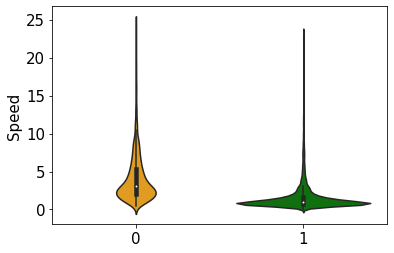

In [396]:
#Speed
sns.violinplot( data=data_to_plot, palette=['orange', 'green'])
plt.ylabel('Speed')

Text(0, 0.5, 'Distance to Speaker')

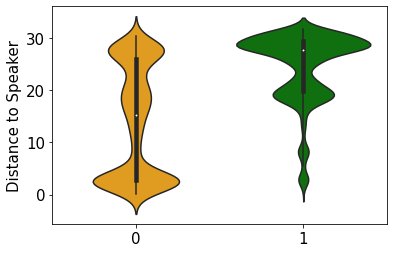

In [262]:
#Distance

DistSpeakerCry=DistanceMouseSpeaker[AllCrybool][~np.isnan(DistanceMouseSpeaker[AllCrybool])]
DistSpeakerWhis=DistanceMouseSpeaker[AllWhistlebool][~np.isnan(DistanceMouseSpeaker[AllWhistlebool])]
DistSpeakerCry.tolist()
DistSpeakerWhis.tolist()
data_to_plot = [DistSpeakerCry.tolist(), DistSpeakerWhis.tolist()]

sns.violinplot( data=data_to_plot, palette=['orange', 'green'])
plt.ylabel('Distance to Speaker')

(array([31564, 39172, 54528, 65737, 89560]),)
(array([32464, 40163, 56328, 67537, 93068]),)
[1051.0812 1304.4276 1815.7824 2189.0421 2982.348 ]
(array([24974, 44645, 49384, 58976, 62035, 70380, 80892]),)
(array([25545, 45126, 49535, 59247, 62396, 70801, 84400]),)
[ 850.6485 1502.6958 1649.5155 1972.9251 2077.7868]


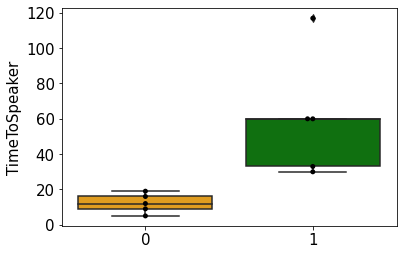

In [263]:
WBoolFlipsup=np.where(np.append(np.diff(1*AllWhistlebool), np.diff(1*AllWhistlebool)[-1])==1)
WBoolFlipsdn=np.where(np.append(np.diff(1*(AllWhistlebool)), np.diff(1*AllWhistlebool)[-1])==-1)
print(WBoolFlipsup)
print(WBoolFlipsdn)

TimeWFlipUp=TimeVector[WBoolFlipsup]
TimeWFlipDown=TimeVector[WBoolFlipsdn]
print(TimeWFlipUp)


CBoolFlipsup=np.where(np.append(np.diff(1*AllCrybool), np.diff(1*AllCrybool)[-1])==1)
CBoolFlipsdn=np.where(np.append(np.diff(1*(AllCrybool)), np.diff(1*AllCrybool)[-1])==-1)
print(CBoolFlipsup)
print(CBoolFlipsdn)

TimeCFlipUp=TimeVector[CBoolFlipsup]
TimeCFlipDown=TimeVector[CBoolFlipsdn]


TimeCries=TimeCFlipDown[0:5]-TimeCFlipUp[0:5]
TimeWhistles=TimeWFlipDown[0:5]-TimeWFlipUp[0:5]


# DistSpeakerCry=DistanceMouseSpeaker[AllCrybool][~np.isnan(DistanceMouseSpeaker[AllCrybool])]
# DistSpeakerWhis=DistanceMouseSpeaker[AllWhistlebool][~np.isnan(DistanceMouseSpeaker[AllWhistlebool])]
# DistSpeakerCry.tolist()
# DistSpeakerWhis.tolist()
data_to_plot = [TimeCries.tolist(), TimeWhistles.tolist()]

sns.swarmplot( data=data_to_plot, palette=['black', 'black'])
sns.boxplot( data=data_to_plot, palette=['orange', 'green'])
plt.ylabel('TimeToSpeaker')
print(TimeCFlipDown[0:5])

Starting Loop for Database

In [266]:
print(SessionsToRun)

DataframePlayback=[]


for Example in SessionsToRun:
    
    Species=Example[0:2]
    Sex=Example[3]
    Identity=Example[5:10]
    Date=Example[11:]
    
    
    #Grab from Folder the files for Centroid and TTL
    ExampleSessionCentroid=  [f for f in os.listdir(Path_Files+Example) if f.startswith('centroid')] 
    ExampleSessionTTL= [f for f in os.listdir(Path_Files+Example) if f.startswith('Playback_TTL')] 
    #Load Tracking(centroid) and TTL
    tracking=np.genfromtxt([Path_Files+Example+ '/'  +ExampleSessionCentroid[0]][0], delimiter=',')
    TTL=np.genfromtxt([Path_Files+Example+ '/' +ExampleSessionTTL[0]][0], delimiter=',')
    
    #Rescaling from pixels to cm
    Scale=8.8
    tracking=tracking/Scale
    
    #Checking for equal size of files because Bonsai might miss a row at the end when closing.
    if np.size(tracking,0)!=np.size(TTL):
        minimum=np.min([np.size(tracking,0),np.size(TTL)])
        TTL=TTL[0:minimum]
        tracking=tracking[0:minimum,:]
        print(minimum)
    
    #Thresholding TTL
    TTL[:]=TTL>1
    
    # Taking consecutive difference between TTL's to find TTL onsets and offsets
    DiffTTL= np.diff(TTL)
    DiffTTL=np.append(DiffTTL,DiffTTL[-1])
    
    #Analyzing the TTL flips
    HighFlips=np.where(DiffTTL>0.5) #HighFlips is an index of the HighFlips
    #print(np.size(HighFlips))
    #print(HighFlips)

    #DiffFlip is the value of the Diff when the flip is high
    DiffFlips=np.diff(HighFlips)

    DiffFlips=np.append(DiffFlips[0],DiffFlips[0][-1]) #correcting for length
    #print(np.size(DiffFlips))
    
    #Defining which TTL flips correspond to which vocalization type based on the InterFlip Interval (DiffFlip)
    CryFlips=( DiffFlips> 28) & (DiffFlips < 32)
    WhistleFlips=( DiffFlips> 88) & (DiffFlips < 92)
    EndFlips=( DiffFlips> 95)
    
    #Making a Logical vector for when vocalizations are played
    allVector=np.arange(0,np.size(TTL,0),1)
    AllCry=np.interp(allVector, HighFlips[0], CryFlips)
    AllWhistle=np.interp(allVector, HighFlips[0], WhistleFlips)

    #Cleaning before and after first and last High Flip
    AllWhistle[allVector<HighFlips[0][0]]=False

    AllCry[allVector<HighFlips[0][0]]=False

    AllWhistle[allVector>HighFlips[0][-1]]=False

    AllCry[allVector>HighFlips[0][-1]]=False

    #Selecting only the true Highs because of ramp artifact of interp
    AllCrybool=AllCry==1
    AllWhistlebool=AllWhistle==1
    
    
    #Removing jumps in tracking and interpolating tracking
    diffX=np.diff(tracking[:,0])
    diffY=np.diff(tracking[:,1])

    diffX=np.append(diffX,diffX[-1])
    diffY=np.append(diffY,diffY[-1])

    
    EraseX=np.where(np.abs(diffX)>1.3)
    EraseY=np.where(np.abs(diffY)>1.3)
    #print(EraseY)
    #print(EraseX)
    Erase=np.append(EraseX, EraseY)

    Erase=np.unique(Erase)
    
    
    
    #Erasing outliers

    tracking[Erase,:] = np.NAN

    diffX=np.diff(tracking[:,0])
    diffY=np.diff(tracking[:,1])

    diffX=np.append(diffX,diffX[-1])
    diffY=np.append(diffY,diffY[-1])
    
    #interpolating nans

    NaNIndexes=np.where(np.isnan(tracking[:,0]))
    NaNTracking=NaNIndexes
    tracking[NaNIndexes,0]=np.interp(NaNIndexes[0],np.where(~np.isnan(tracking[:,0]))[0],tracking[np.where(~np.isnan(tracking[:,0])),0][0])
    tracking[NaNIndexes,1]=np.interp(NaNIndexes[0],np.where(~np.isnan(tracking[:,1]))[0],tracking[np.where(~np.isnan(tracking[:,1])),1][0])

    # Smoothing X and Y with a gaussian filter
    sigma1 = 5
    Filter=gaussian_filter_1d(size=60,sigma=sigma1)
    tracking[:,0]=np.convolve(tracking[:,0], Filter, 'same')
    tracking[:,1]=np.convolve(tracking[:,1], Filter, 'same')
    
    #Gaussian filtering the speed and Calculating speed

    TimeVector=np.arange(0,0.0333*np.size(TTL,0),0.0333)
    Speedpre=CalcSpeed(tracking, 30)
    Speedpre=np.append(Speedpre,Speedpre[-1])
    sigma1 = 10
    Filter=gaussian_filter_1d(size=60,sigma=sigma1)
    Speed=np.convolve(Speedpre, Filter, 'same')
    
    #Calculating Distances to Nest and Speaker
    DistanceMouseSpeaker=beh.CalcDistance(tracking[:,0], tracking[:,1], 5, 22.5)
    DistanceMouseNest=beh.CalcDistance(tracking[:,0], tracking[:,1], 31, 6)
    
    #Median of speeds During Cry and Whistle
    SpeedCryMedian=np.median(Speed[AllCrybool])
    SpeedWhistleMedian=np.median(Speed[AllWhistlebool])
    #90 percentile of speeds During Cry and Whistle
    SpeedCryMax=np.percentile(Speed[AllCrybool], 99)
    SpeedWhistleMax=np.percentile(Speed[AllWhistlebool], 99)   
    
    #Trayectories During Vocalization
    
    
    
    #Median Distance to Speaker
    
    MedianDistSpeakerCry=np.median(DistanceMouseSpeaker[AllCrybool][~np.isnan(DistanceMouseSpeaker[AllCrybool])])
    MedianDistSpeakerWhis=np.median(DistanceMouseSpeaker[AllWhistlebool][~np.isnan(DistanceMouseSpeaker[AllWhistlebool])])
    # Minimimum Distance to Speaker
    
    MinDistSpeakerCry=np.percentile(DistanceMouseSpeaker[AllCrybool][~np.isnan(DistanceMouseSpeaker[AllCrybool])], 1)
    MinDistSpeakerWhis=np.percentile(DistanceMouseSpeaker[AllWhistlebool][~np.isnan(DistanceMouseSpeaker[AllWhistlebool])],1)
    
    
    #Calculating Time of response During Cry and Whistle
    
    #Indexes where TTL boolean of Cries and Whistles goes up or down
    WBoolFlipsup=np.where(np.append(np.diff(1*AllWhistlebool), np.diff(1*AllWhistlebool)[-1])==1)
    WBoolFlipsdn=np.where(np.append(np.diff(1*(AllWhistlebool)), np.diff(1*AllWhistlebool)[-1])==-1)
    CBoolFlipsup=np.where(np.append(np.diff(1*AllCrybool), np.diff(1*AllCrybool)[-1])==1)
    CBoolFlipsdn=np.where(np.append(np.diff(1*(AllCrybool)), np.diff(1*AllCrybool)[-1])==-1)
    

    
    #Assining a time based on Timevector to those flips indexes
    TimeWFlipUp=TimeVector[WBoolFlipsup]
    TimeWFlipDown=TimeVector[WBoolFlipsdn]
    TimeCFlipUp=TimeVector[CBoolFlipsup]
    TimeCFlipDown=TimeVector[CBoolFlipsdn]
    
    #Define End of Experiment
    ExtraFrames=300
    print(CBoolFlipsdn[0][4])
    if Identity=="31922":
        EndOfExperiment=np.max([ CBoolFlipsdn[0][4], WBoolFlipsdn[0][3]]) +ExtraFrames
    else:
        EndOfExperiment=np.max([ CBoolFlipsdn[0][4], WBoolFlipsdn[0][4]])+ExtraFrames
    

    #Calculating the Time when the TTL is on for Cries and Whistles, only for the first 5 trials of each which correspond to the actual experiment
    TimeCries=TimeCFlipDown[0:5]-TimeCFlipUp[0:5]
    TimeWhistles=TimeWFlipDown[0:5]-TimeWFlipUp[0:5]
    
    #Median Time per animal per Cry vs Whistles
    
    MedianResponseTimeCry=np.median(TimeCries)
    MedianResponseTimeWhistle=np.median(TimeWhistles)
    
    
    DataframePlayback.append({ "species" : Species ,
                               "sex" : Sex ,
                              "id" : Identity,
                              "date":Date, 
                              "median_time_cry":MedianResponseTimeCry,
                              "median_time_whistle": MedianResponseTimeWhistle,
                              "max_speed_cry": SpeedCryMax,
                              "max_speed_whistle": SpeedWhistleMax,
                              "min_dist_cry":MinDistSpeakerCry  ,
                              "min_dist_whistle":MinDistSpeakerWhis ,
                              "median_dist_cry":MedianDistSpeakerCry  ,
                              "median_dist_whistle":MedianDistSpeakerWhis,
                              "distance_to_speaker": DistanceMouseSpeaker  ,
                              "nan_tracking": NaNTracking , 
                              "time_vector": TimeVector ,
                              "all_cry_bool": AllCrybool,
                              "all_whistle_bool": AllWhistlebool,
                              "index_onset_cry":CBoolFlipsup ,
                              "index_onset_whistle":WBoolFlipsup ,
                              "end_experiment": EndOfExperiment
                              
    
    
    
    
    
    
    
    })




DataframePlayback=pd.DataFrame(DataframePlayback)    
  


['BW_f_29483_2022_7_15', 'BW_f_28988_2022_3_16', 'BW_f_29916_2022_2_23', 'BW_f_29915_2022_3_03', 'BW_f_31922_2022_3_01']
116713
80033
64792
113906
72832
62396


In [267]:
DataframePlayback

species sex     id       date  median_time_cry  median_time_whistle  \
0      BW   f  29483  2022_7_15          10.0233              53.9460   
1      BW   f  28988  2022_3_16           9.0243              92.8737   
2      BW   f  29916  2022_2_23          13.0203             116.8164   
3      BW   f  29915  2022_3_03          27.0063             113.8194   
4      BW   f  31922  2022_3_01          12.0213              59.9400   

   max_speed_cry  max_speed_whistle  min_dist_cry  min_dist_whistle  \
0      13.453648           4.932879      0.927895         17.598707   
1      11.479694           2.921876      0.701761         18.993332   
2      14.044586           2.084868      0.678418         26.887548   
3      11.576581           8.286419      1.780187         18.366606   
4      17.108957          13.943631      1.161753          2.765710   

   median_dist_cry  median_dist_whistle  \
0         7.809512            27.037954   
1        26.310844            30.838766   
2        22.811818            28.297941   
3        32.548573            32.016083   
4        15.157697            27.613558   

                                 distance_to_speaker  \
0  [14.916379372809313, 13.61050515089005, 12.359...   
1  [11.623646358903986, 11.009803644874609, 10.99...   
2  [13.56184615579367, 12.042830494964127, 10.590...   
3  [23.059179304726463, 24.096498166658744, 25.30...   
4  [15.703303204797669, 16.55261895277934, 17.872...   

                                        nan_tracking  \
0  ([708, 854, 855, 856, 857, 858, 859, 860, 861,...   
1  ([134, 190, 259, 260, 261, 262, 294, 296, 319,...   
2  ([97, 109, 124, 173, 239, 251, 280, 289, 294, ...   
3  ([307, 308, 309, 310, 311, 312, 313, 314, 315,...   
4  ([194, 195, 196, 197, 198, 199, 200, 345, 346,...   

                                         time_vector  \
0  [0.0, 0.0333, 0.0666, 0.09990000000000002, 0.1...   
1  [0.0, 0.0333, 0.0666, 0.09990000000000002, 0.1...   
2  [0.0, 0.0333, 0.0666, 0.09990000000000002, 0.1...   
3  [0.0, 0.0333, 0.0666, 0.09990000000000002, 0.1...   
4  [0.0, 0.0333, 0.0666, 0.09990000000000002, 0.1...   

                                        all_cry_bool  \
0  [False, False, False, False, False, False, Fal...   
1  [False, False, False, False, False, False, Fal...   
2  [False, False, False, False, False, False, Fal...   
3  [False, False, False, False, False, False, Fal...   
4  [False, False, False, False, False, False, Fal...   

                                    all_whistle_bool  \
0  [False, False, False, False, False, False, Fal...   
1  [False, False, False, False, False, False, Fal...   
2  [False, False, False, False, False, False, Fal...   
3  [False, False, False, False, False, False, Fal...   
4  [False, False, False, False, False, False, Fal...   

                                     index_onset_cry  \
0  ([17970, 54267, 59190, 62237, 79702, 105280, 1...   
1  ([24785, 36871, 52208, 61509, 64462, 78572, 83...   
2  ([26011, 45022, 55774, 93166, 113515, 118291, ...   
3  ([25856, 39880, 51343, 57878, 69234, 89926, 10...   
4  ([24974, 44645, 49384, 58976, 62035, 70380, 80...   

                                 index_onset_whistle  end_experiment  
0             ([50545, 64879, 68632, 82782, 90200],)           92120  
1  ([27946, 40907, 47751, 55589, 67397, 99932, 10...           71116  
2            ([33499, 39280, 79900, 87529, 107209],)          114206  
3      ([19592, 34293, 44076, 63096, 77045, 97565],)           80673  
4             ([31564, 39172, 54528, 65737, 89560],)           67837

median_time_cry    10.0233
Name: 0, dtype: float64


(-0.5, 1.5)

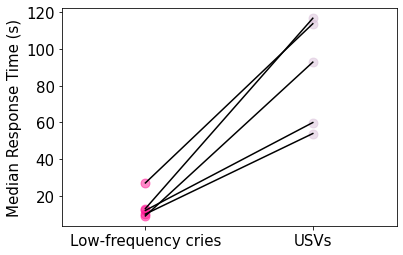

In [269]:

# your input data:
print(DataframePlayback[["median_time_cry"]].iloc[0])

# plotting the points
plt.scatter(np.zeros(len(DataframePlayback[["median_time_cry"]])), DataframePlayback[["median_time_cry"]], color='deeppink', s=80, alpha=0.5 )
plt.scatter(np.ones(len(DataframePlayback[[ "median_time_whistle"]])), DataframePlayback[[ "median_time_whistle"]], color='thistle', s=80, alpha=0.5 )

# plotting the lines
for i in range(len(DataframePlayback[[ "median_time_whistle"]])):
    plt.plot( [0,1], [DataframePlayback[["median_time_cry"]].iloc[i], DataframePlayback[[ "median_time_whistle"]].iloc[i]], c='k')

plt.xticks([0,1], ["Low-frequency cries", "USVs"],   fontname="Arial", fontsize=15)
plt.ylabel('Median Response Time (s)',   fontname="Arial", fontsize=15)
plt.xlim(-0.5,1.5)
#plt.axes().set_aspect(1)


#plt.savefig(f'C:/Users/jisan/Documents/Data/Playbacks/Figures/MedianTimeToSpeakerLines.pdf')#, bbox_inches='tight',  dpi=300, pad_inches=0.1)


116.81639999999993


(0.0, 120.0)

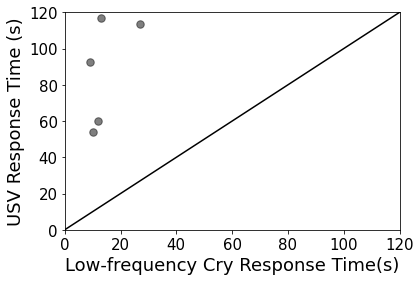

In [271]:

plt.plot(DataframePlayback[["median_time_cry"]], DataframePlayback[[ "median_time_whistle"]], '.k', markersize=15, alpha=0.5)
maxt=np.max(np.max(DataframePlayback[["median_time_cry", "median_time_whistle"]]))
print(maxt)

plt.xlim(0, 120)
plt.ylim(0, 120)
plt.plot([0,120], [0,120], '-k')
plt.ylabel("USV Response Time (s)",  fontname="Arial", fontsize=18)
plt.xlabel("Low-frequency Cry Response Time(s)",  fontname="Arial", fontsize=18)
plt.ylim(0, 120)
#plt.plot(x, y, '-k ')
#plt.axes().set_aspect( 'equal','box')
# square plot

#plt.savefig(f'C:/Users/jisan/Documents/Data/Playbacks/Figures/MedianTimeToSpeakerDiag.pdf')#, bbox_inches='tight',  dpi=300, pad_inches=0.1)


Ttest_relResult(statistic=array([-6.26917524]), pvalue=array([0.00330379]))

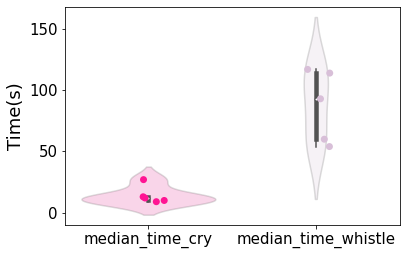

In [272]:
ax=sns.violinplot(data=DataframePlayback[["median_time_cry", "median_time_whistle"]], palette=['deeppink', 'thistle'])
for violin, alpha in zip(ax.collections[::2], [0.2,0.2]):
    violin.set_alpha(alpha)
sns.stripplot( data=DataframePlayback[["median_time_cry", "median_time_whistle"]], palette=['deeppink', 'thistle'],  size=7 ,linewidth=0, jitter=0.1, alpha=1)
plt.ylabel("Time(s)",  fontname="Arial", fontsize=18)

#plt.savefig(f'C:/Users/jisan/Documents/Data/Playbacks/Figures/MedianTimeToSpeaker.pdf')#, bbox_inches='tight',  dpi=300, pad_inches=0.1)
sp.stats.ttest_rel(DataframePlayback[["median_time_cry"]], DataframePlayback[["median_time_whistle"]])

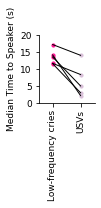

In [357]:


save= True
feature = 'max_speed_'
if feature == 'time_median_':
    y_ticks = [0,30,60,90,120]

elif feature == 'max_speed_':
    y_ticks = [0,5,10,15,20]


# setting up the figure
plt.figure(figsize=[1,1.25])


# plotting the lines
for i in range(len(DataframePlayback[[ feature+"whistle"]])):
    plt.plot( [0,1], [DataframePlayback[[feature+"cry"]].iloc[i], DataframePlayback[[feature+"whistle"]].iloc[i]], c='black', alpha=1, linewidth=1)

# plotting the points
plt.scatter(np.zeros(len(DataframePlayback[[feature+"cry"]])), DataframePlayback[[feature+"cry"]], color='deeppink', s=10, alpha=1)
plt.scatter(np.ones(len(DataframePlayback[[ feature+"whistle"]])), DataframePlayback[[ feature+"whistle"]], color='thistle', s=10 , alpha=1)
    
plt.xticks([0,1], ["Low-frequency cries", "USVs"],   fontname="Arial", fontsize=9, rotation=90)
plt.yticks(y_ticks, fontname="Arial", fontsize=9)
plt.ylabel('Median Time to Speaker (s)',   fontname="Arial", fontsize=9)
plt.xlim(-0.5,1.5)

sns.despine()

if save:
    save_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/figures/figure_3/'
    save_name = feature+'.svg'
    plt.savefig(os.path.join(save_dir,save_name), bbox_inches = 'tight')
    


In [352]:
np.max(DataframePlayback[[feature+"whistle"]])

median_time_whistle    116.8164
dtype: float64

In [328]:
DataframePlayback


species sex     id       date  median_time_cry  median_time_whistle  \
0      BW   f  29483  2022_7_15          10.0233              53.9460   
1      BW   f  28988  2022_3_16           9.0243              92.8737   
2      BW   f  29916  2022_2_23          13.0203             116.8164   
3      BW   f  29915  2022_3_03          27.0063             113.8194   
4      BW   f  31922  2022_3_01          12.0213              59.9400   

   max_speed_cry  max_speed_whistle  min_dist_cry  min_dist_whistle  \
0      13.453648           4.932879      0.927895         17.598707   
1      11.479694           2.921876      0.701761         18.993332   
2      14.044586           2.084868      0.678418         26.887548   
3      11.576581           8.286419      1.780187         18.366606   
4      17.108957          13.943631      1.161753          2.765710   

   median_dist_cry  median_dist_whistle  \
0         7.809512            27.037954   
1        26.310844            30.838766   
2        22.811818            28.297941   
3        32.548573            32.016083   
4        15.157697            27.613558   

                                 distance_to_speaker  \
0  [14.916379372809313, 13.61050515089005, 12.359...   
1  [11.623646358903986, 11.009803644874609, 10.99...   
2  [13.56184615579367, 12.042830494964127, 10.590...   
3  [23.059179304726463, 24.096498166658744, 25.30...   
4  [15.703303204797669, 16.55261895277934, 17.872...   

                                        nan_tracking  \
0  ([708, 854, 855, 856, 857, 858, 859, 860, 861,...   
1  ([134, 190, 259, 260, 261, 262, 294, 296, 319,...   
2  ([97, 109, 124, 173, 239, 251, 280, 289, 294, ...   
3  ([307, 308, 309, 310, 311, 312, 313, 314, 315,...   
4  ([194, 195, 196, 197, 198, 199, 200, 345, 346,...   

                                         time_vector  \
0  [0.0, 0.0333, 0.0666, 0.09990000000000002, 0.1...   
1  [0.0, 0.0333, 0.0666, 0.09990000000000002, 0.1...   
2  [0.0, 0.0333, 0.0666, 0.09990000000000002, 0.1...   
3  [0.0, 0.0333, 0.0666, 0.09990000000000002, 0.1...   
4  [0.0, 0.0333, 0.0666, 0.09990000000000002, 0.1...   

                                        all_cry_bool  \
0  [False, False, False, False, False, False, Fal...   
1  [False, False, False, False, False, False, Fal...   
2  [False, False, False, False, False, False, Fal...   
3  [False, False, False, False, False, False, Fal...   
4  [False, False, False, False, False, False, Fal...   

                                    all_whistle_bool  \
0  [False, False, False, False, False, False, Fal...   
1  [False, False, False, False, False, False, Fal...   
2  [False, False, False, False, False, False, Fal...   
3  [False, False, False, False, False, False, Fal...   
4  [False, False, False, False, False, False, Fal...   

                                     index_onset_cry  \
0  ([17970, 54267, 59190, 62237, 79702, 105280, 1...   
1  ([24785, 36871, 52208, 61509, 64462, 78572, 83...   
2  ([26011, 45022, 55774, 93166, 113515, 118291, ...   
3  ([25856, 39880, 51343, 57878, 69234, 89926, 10...   
4  ([24974, 44645, 49384, 58976, 62035, 70380, 80...   

                                 index_onset_whistle  end_experiment  
0             ([50545, 64879, 68632, 82782, 90200],)           92120  
1  ([27946, 40907, 47751, 55589, 67397, 99932, 10...           71116  
2            ([33499, 39280, 79900, 87529, 107209],)          114206  
3      ([19592, 34293, 44076, 63096, 77045, 97565],)           80673  
4             ([31564, 39172, 54528, 65737, 89560],)           67837

In [316]:

# plt.plot(DataframePlayback[["max_speed_cry"]], DataframePlayback[[ "max_speed_whistle"]], '.k', markersize=15, alpha=0.5)
# maxt=np.max(np.max(DataframePlayback[["max_speed_cry", "max_speed_cry"]]))
# print(maxt)

# plt.xlim(0, 20)
# plt.ylim(0, 20)
# plt.plot([0,20], [0,20], '-k')
# plt.ylabel("USV Response Speed (cm/s)",  fontname="Arial", fontsize=18)
# plt.xlabel("Low-frequency Cry Response Speed (cm/s)",  fontname="Arial", fontsize=18)

# #plt.plot(x, y, '-k ')
# plt.axes().set_aspect('equal', 'box')
# # square plot

# #plt.savefig(f'C:/Users/jisan/Documents/Data/Playbacks/Figures/MedianPeakSpeadDiag.pdf')#, bbox_inches='tight',  dpi=300, pad_inches=0.1)


Ttest_relResult(statistic=array([4.17728785]), pvalue=array([0.01394881]))

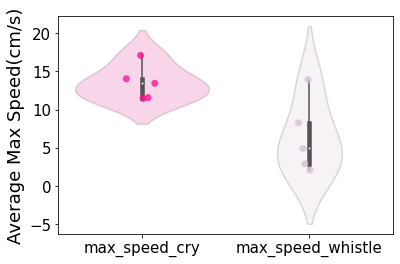

In [275]:
ax=sns.violinplot(data=DataframePlayback[["max_speed_cry", "max_speed_whistle"]], palette=['deeppink', 'thistle'])
for violin, alpha in zip(ax.collections[::2], [0.2,0.2]):
    violin.set_alpha(alpha)
sns.stripplot( data=DataframePlayback[["max_speed_cry", "max_speed_whistle"]], palette=['deeppink', 'thistle'],  size=7 ,linewidth=0, jitter=0.1, alpha=.8)
plt.ylabel("Average Max Speed(cm/s)", fontname="Arial", fontsize=18)

#plt.savefig(f'C:/Users/jisan/Documents/Data/Playbacks/Figures/MaxSpeedToSpeaker.pdf')#, bbox_inches='tight',  dpi=300, pad_inches=0.1)


sp.stats.ttest_rel(DataframePlayback[["max_speed_cry"]], DataframePlayback[["max_speed_whistle"]])

Text(0, 0.5, 'Minimum Distance to Speaker per animal(cm)')

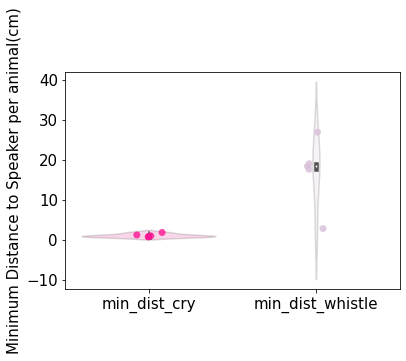

In [276]:
ax=sns.violinplot(data=DataframePlayback[["min_dist_cry", "min_dist_whistle"]], palette=['deeppink', 'thistle'])
for violin, alpha in zip(ax.collections[::2], [0.2,0.2]):
    violin.set_alpha(alpha)
sns.stripplot( data=DataframePlayback[["min_dist_cry", "min_dist_whistle"]], palette=['deeppink', 'thistle'],  size=7 ,linewidth=0, jitter=0.1, alpha=.8)
plt.ylabel("Minimum Distance to Speaker per animal(cm)")

Text(0, 0.5, 'Median Distance to Speaker During Voc(cm)')

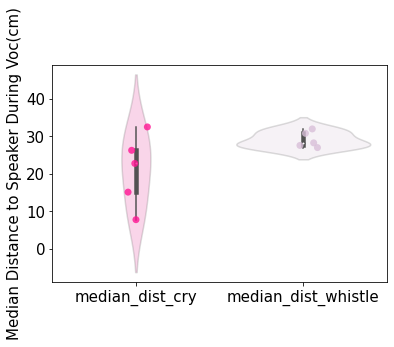

In [277]:
ax=sns.violinplot(data=DataframePlayback[["median_dist_cry", "median_dist_whistle"]], palette=['deeppink', 'thistle'])
for violin, alpha in zip(ax.collections[::2], [0.2,0.2]):
    violin.set_alpha(alpha)
sns.stripplot( data=DataframePlayback[["median_dist_cry", "median_dist_whistle"]], palette=['deeppink', 'thistle'],  size=7 ,linewidth=0, jitter=0.1, alpha=.8)
plt.ylabel("Median Distance to Speaker During Voc(cm)")

In [278]:
EndOfExp.item()


NameError: name 'EndOfExp' is not defined

In [279]:
DataframePlayback.loc[DataframePlayback["id"]==identity, "time_vector"].to_numpy()[0]

NameError: name 'identity' is not defined

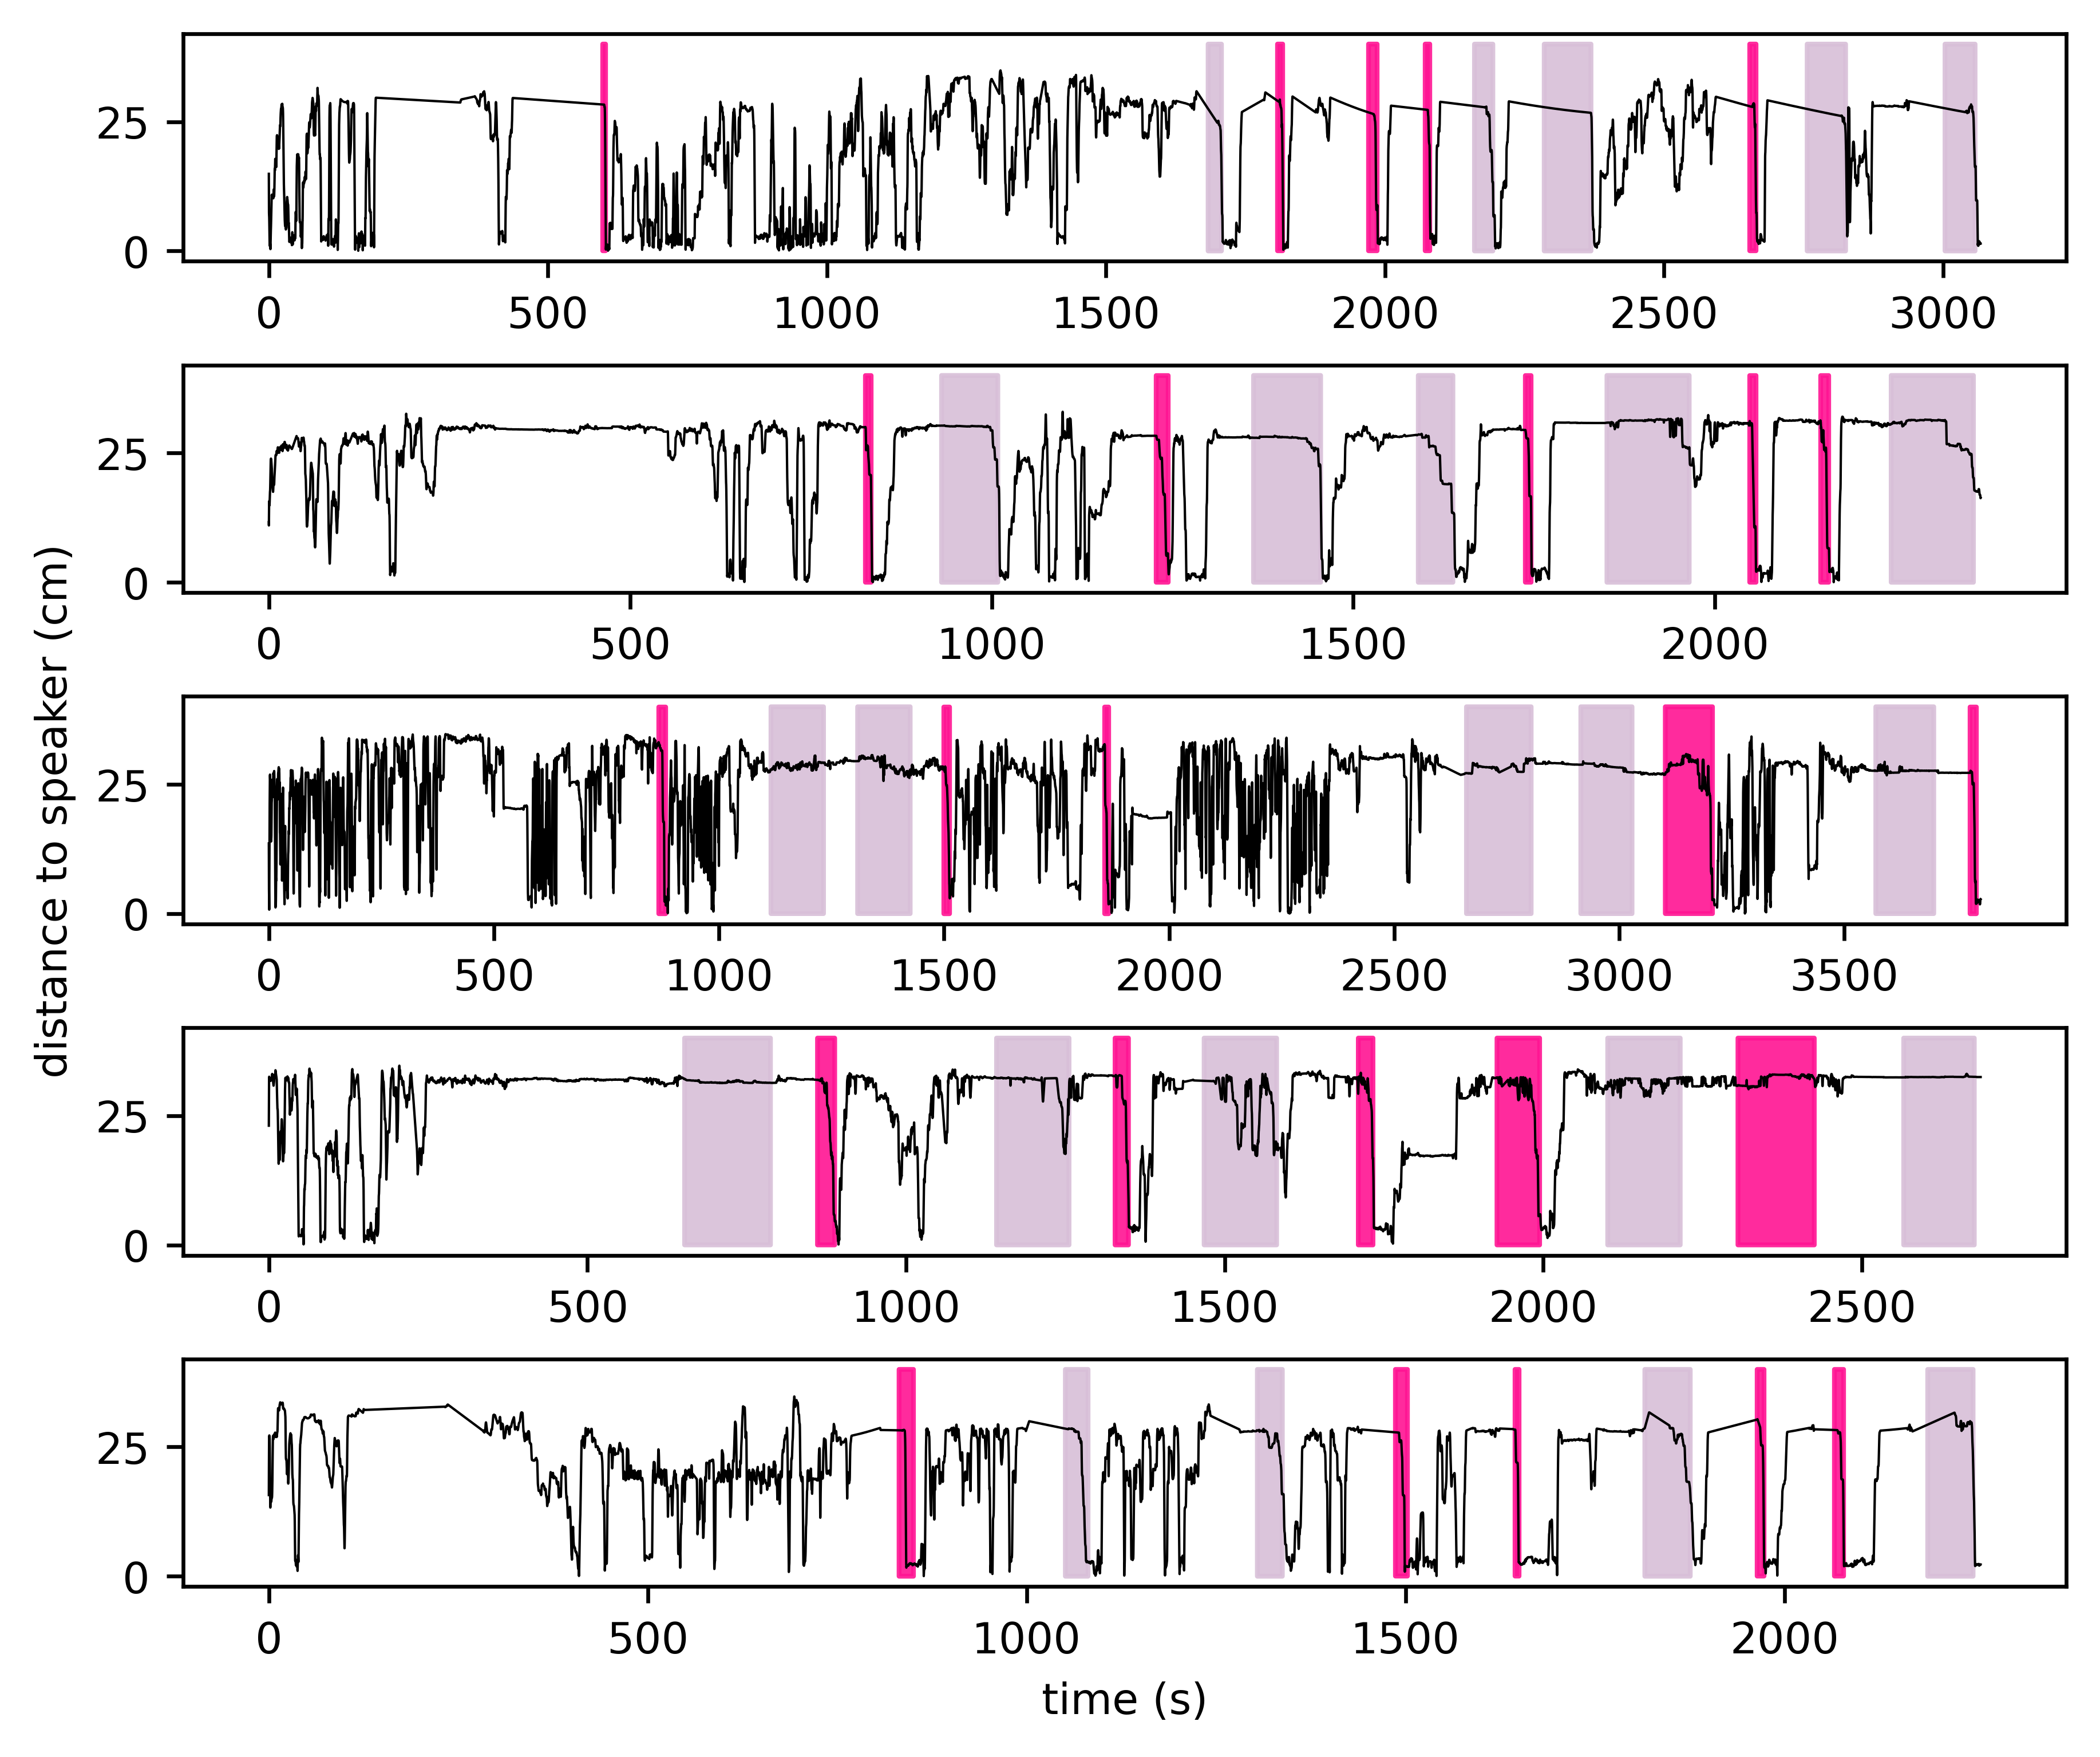

In [372]:
save=True

fontsize = 9
figure(num=None, figsize=(6, 5), 
       dpi=600, 
       facecolor='w', 
       edgecolor='black', constrained_layout=True)

#plt.subplots_adjust(bottom=0.1)

plotindex=1

for identity in DataframePlayback["id"]:

    EndOfExp=DataframePlayback.loc[DataframePlayback["id"]==identity, "end_experiment"].item()
    ax=plt.subplot(5,1,plotindex)

    #plt.scatter( TimeVector[Begin:Ending], DistanceMouseSpeaker[Begin:Ending],c=Speed[Begin:Ending], s=20, alpha=0.5,  vmin=0, vmax=20)
    plt.plot( DataframePlayback.loc[DataframePlayback["id"]==identity, "time_vector"].to_numpy()[0][0:EndOfExp],DataframePlayback.loc[DataframePlayback["id"]==identity, "distance_to_speaker"].to_numpy()[0][0:EndOfExp],color="black", linewidth=0.5)
    #plt.xlabel('Time')
    
    #plt.xlim([600, 1800])
    #plt.plot(TimeVector[Begin:Ending], DiffTTL[Begin:Ending], 'k' )
    #plt.scatter(TimeVector[HighFlips], DiffTTL[HighFlips],c=DiffFlips, s=200, alpha=1, vmin=0, vmax=180 , cmap='gist_rainbow')


    ax.fill_between(DataframePlayback.loc[DataframePlayback["id"]==identity, "time_vector"].to_numpy()[0][0:EndOfExp],0,40, where=DataframePlayback.loc[DataframePlayback["id"]==identity, "all_cry_bool"].to_numpy()[0][0:EndOfExp],  alpha=0.9, color='deeppink')
    ax.fill_between(DataframePlayback.loc[DataframePlayback["id"]==identity, "time_vector"].to_numpy()[0][0:EndOfExp],0,40, where=DataframePlayback.loc[DataframePlayback["id"]==identity, "all_whistle_bool"].to_numpy()[0][0:EndOfExp],  alpha=0.9, color='thistle')
    
    
    plt.rcParams.update({'font.size': fontsize})
    #plt.xlim([1200, 1400])
    if plotindex==3:
        plt.ylabel('distance to speaker (cm)', fontname="Arial", fontsize=fontsize)  
        
    if plotindex!=5:
        plt.xlabel('')
    elif plotindex==5:
        plt.xlabel('time (s)', fontname="Arial", fontsize=fontsize)
        
    plotindex=plotindex+1
    
     


if save:
    save_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/figures/figure_3/'
    save_name = 'all_distance_plot.svg'
    plt.savefig(os.path.join(save_dir,save_name), bbox_inches = 'tight')

plt.show()

#plt.savefig(f'C:/Users/jisan/Documents/Data/Playbacks/Figures/AllMothersPanelC2.pdf')#, bbox_inches='tight',  dpi=300, pad_inches=0.1)


In [373]:
save = True

if save:
    save_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/figures/figure_3/'
    save_name = 'all_dam_playback.csv'
    DataframePlayback.to_csv(os.path.join(save_dir, save_name), index=False)

In [101]:
#plt.savefig('C:/Users/jisan/Documents/Data/Playbacks/Figures/AllMothersPanelC3.png')#, bbox_inches='tight',  dpi=300, pad_inches=0.1)


<Figure size 432x288 with 0 Axes>

In [48]:
CombinedBools=AllCrybool*(-1) + AllWhistlebool*1


IndexesWithVocal=np.where(CombinedBools!=0)

In [25]:
IndexesWithVocal[0][2]

24977

In [38]:
print(NaNIndexes[0])

[  194   195   196 ... 96093 96094 96095]


[432. 288.]


C:\Users\jisan\anaconda3\envs\Vame\lib\site-packages\ipykernel_launcher.py:68: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN


KeyboardInterrupt: 

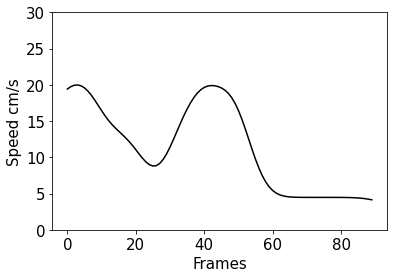

In [51]:


import matplotlib
matplotlib.use('TkAgg')
import cv2
from cv2 import __version__

fig,ax=plt.subplots()
#print( fig.get_size_inches()*fig.dpi) 


Speed0,=ax.plot(range(0,90), np.zeros(90), 'k-')
#print( fig.get_size_inches()*fig.dpi) 

ax.set_ylim(0,30)
ax.set_ylabel("Speed cm/s")
ax.set_xlabel("Frames")

print( fig.get_size_inches()*fig.dpi) 
VidPreFile= [f for f in os.listdir(Path_Files+SessionsToRun[Example]) if f.startswith('Playback_video')] 
VideoFile=cv2.VideoCapture(Path_Files+SessionsToRun[Example]+ '/' +VidPreFile[0])
fps=VideoFile.get(5)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(Path_Files +  'TriggerredBehaviorsv2Mother' + SessionsToRun[Example] + '.avi', fourcc, 30,  (432,576))


   

    
  

    

Time=0
#Iterate in all of the frames that have a cry or a whistle as defined by Indexes with Vocal
for i in range(0,np.size(IndexesWithVocal),5):
    
    VideoFile=cv2.VideoCapture(Path_Files+SessionsToRun[Example]+ '/' +VidPreFile[0])
    fps=VideoFile.get(5)
    TotalFrames=VideoFile.get(7)
    #Framechosen is the IndexWithVocal for i 
    FrameChosen=IndexesWithVocal[0][i]
    #print(FrameChosen)
    #print(Subs)
    #print(FrameChosen[0][0])
    VideoFile.set(cv2.CAP_PROP_POS_FRAMES,int(FrameChosen))
    

    

    fps=VideoFile.get(5)
    TotalFrames=VideoFile.get(7)

    width=VideoFile.get(3)

    height=VideoFile.get(4)

 
    
    


    Speed0.set_ydata(Speed[FrameChosen-90:FrameChosen])
    
    #print(len(Speed[FrameChosen-90:FrameChosen]))
    #print( fig.get_size_inches()*fig.dpi) 

    fig.canvas.draw()
    #fig.canvas.draw()
    img2 = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    img2  = img2.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    # img2 is rgb, convert to opencv's default bgr
    img2 = cv2.cvtColor(img2,cv2.COLOR_RGB2BGR)


# display image with opencv or any operation you like

    
    #print(FramesAroundEvent[j])
    x, frame = VideoFile.read()
    img=frame
    if FrameChosen in NaNIndexes[0]:
        print('NaN')
    else:     
        if CombinedBools[FrameChosen]==-1:
            img = cv2.circle(img,tuple([int(tracking[FrameChosen,0]*Scale),int(tracking[FrameChosen,1]*Scale)]), 6,  (147,20,255), -1)
        if CombinedBools[FrameChosen]==1:
            img = cv2.circle(img,tuple([int(tracking[FrameChosen,0]*Scale),int(tracking[FrameChosen,1]*Scale)]), 6, (216, 191, 216), -1)    
    #         img = cv2.circle(img,(int(Bodyparts[FullStretchWithConfidence[i],3]*ScaleX+ShiftX),int(Bodyparts[FullStretchWithConfidence[i],4]*ScaleY+ShiftY)), 6, (255,0,0), -1)
    #         img = cv2.putText(img,DistanceNoseTailString, (50,50) , cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),2 )
    
    #img2=cv2.vconcat([img, img2]) 
    img=cv2.resize(img,(432,288))
    img2=cv2.resize(img2,(432,288))

    img3=cv2.vconcat([img, img2])
#         print(img2.shape)
#         print(img.shape)
#         print(img3.shape)
    if FrameChosen-IndexesWithVocal[0][i-5]<10:
        Time=Time+0.166
    else:
        Time=0
    
    
    img3 = cv2.putText(img3,'Seconds=' +str(round(Time,2)) , (100,20) , cv2.FONT_HERSHEY_SIMPLEX, 1, (50,50,255),2 )
    if CombinedBools[FrameChosen]==-1:
        img3 = cv2.putText(img3,'Cry', (185,320) , cv2.FONT_HERSHEY_SIMPLEX, 1, (147,20,255),3 )
                     
    if CombinedBools[FrameChosen]==1:
        img3 = cv2.putText(img3,'Whistle', (170,320) , cv2.FONT_HERSHEY_SIMPLEX, 1, (216, 191, 216),3)
    out.write(img3)
    #cv2.imshow('frame', img2)
    cv2.imshow('frame', img3)
    cv2.waitKey(2)

        
        
        
VideoFile.release()
out.release()
cv2.destroyAllWindows()
    

In [351]:
VidPreFile


['Playback_video2022-03-01T16_03_14.avi']

In [352]:
[Path_Files+SessionsToRun[Example]+ '/' +VidPreFile[0]]

['C:/Users/jisan/Documents/Data/Playbacks/BW_f_31922_2022_3_01/Playback_video2022-03-01T16_03_14.avi']

In [84]:
Example


0

In [52]:
        
VideoFile.release()
out.release()
cv2.destroyAllWindows()

In [182]:
iteraFrames=DataframePlayback.loc[DataframePlayback["id"]==i, "index_onset_cry"].to_numpy()[0]
print(iteraFrames)
print(np.where(iteraFrames[0]<EndOfExp)[0])
iteraFrames[0][np.where(iteraFrames[0]<EndOfExp)[0]]

(array([24785, 36871, 52208, 61509, 64462, 78572, 83847, 93072],
      dtype=int64),)
[0 1 2 3 4]


array([24785, 36871, 52208, 61509, 64462], dtype=int64)

Text(0, 0.5, 'Distance To Speaker (cm)')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


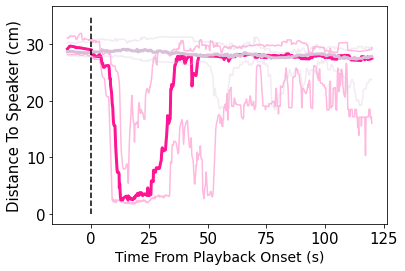

In [283]:
# Code for PSTH Distance to Speaker
start=0
TotalTime=3900
PreTime=300
iterations=25;
#TomMatrix=np.zeros((iterations-start,TotalTime))
CryMatrix=np.zeros((iterations,TotalTime))
USVMatrix=np.zeros((24,TotalTime))
counter=0
for i in DataframePlayback["id"]:
    iteraFrames=DataframePlayback.loc[DataframePlayback["id"]==i, "index_onset_cry"].to_numpy()[0]
    EndOfExp=DataframePlayback.loc[DataframePlayback["id"]==i, "end_experiment"].item()
    iteraFrames2=iteraFrames[0][np.where(iteraFrames[0]<EndOfExp)[0]]

    for ii in iteraFrames2:
        timevector=np.arange(-10,120,1/30)
        #plt.plot(timevector,DataframePlayback.loc[DataframePlayback["id"]==i, "distance_to_speaker"].to_numpy()[0][ii-300:ii+3600], '-',  color="deeppink", linewidth=0.2)
        CryMatrix[counter,:]=np.reshape(DataframePlayback.loc[DataframePlayback["id"]==i, "distance_to_speaker"].to_numpy()[0][ii-300:ii+3600], TotalTime)
        counter=counter+1
        
        
counter=0
for i in DataframePlayback["id"]:
    iteraFrames=DataframePlayback.loc[DataframePlayback["id"]==i, "index_onset_whistle"].to_numpy()[0]
    EndOfExp=DataframePlayback.loc[DataframePlayback["id"]==i, "end_experiment"].item()
    iteraFrames2=iteraFrames[0][np.where(iteraFrames[0]<EndOfExp)[0]]

    for ii in iteraFrames2:
        timevector=np.arange(-10,120,1/30)
        #plt.plot(timevector,DataframePlayback.loc[DataframePlayback["id"]==i, "distance_to_speaker"].to_numpy()[0][ii-300:ii+3600], '-',  color="thistle", linewidth=0.2)
        USVMatrix[counter,:]=np.reshape(DataframePlayback.loc[DataframePlayback["id"]==i, "distance_to_speaker"].to_numpy()[0][ii-300:ii+3600], TotalTime)
        counter=counter+1
    #plt.show()
    #plt.subplot(2,1,2)

# for ii in range(start,iterations):
#     i=FramesStartBehavior.iloc[ii]
# #for i in range(interations):#range((np.size(IndexTTL,1))): #range(20):   
#     plt.plot(dfoF0DA[IndexTTL[i]-PreTime:IndexTTL[i]+TotalTime-PreTime],'g', linewidth=0.2)#/np.mean(dfoF0DA[IndexTTL[i]-PreTime:IndexTTL[i]+0]), 'g',linewidth=0.2)
#     DAMatrix[ii-start,:]=np.reshape(dfoF0DA[IndexTTL[i]-PreTime:IndexTTL[i]+TotalTime-PreTime], TotalTime)#/np.mean(dfoF0DA[IndexTTL[i]-PreTime:IndexTTL[i]+0]),TotalTime)
#     #plt.vlines(500,0.90,1.04, 'k')
    
    
# plt.plot(np.mean(TomMatrix,0), '-k')
plt.plot(timevector, np.median(CryMatrix,0), '-', color="deeppink", linewidth=3)
plt.plot(timevector, np.percentile(CryMatrix,25,axis=0), '-', color="deeppink", alpha=0.3)
plt.plot(timevector, np.percentile(CryMatrix,75,axis=0), '-', color="deeppink", alpha=0.3)
plt.plot(timevector, np.median(USVMatrix,0), '-', color="thistle", linewidth=3)
plt.plot(timevector, np.percentile(USVMatrix,25,axis=0), '-', color="thistle",  alpha=0.3)
plt.plot(timevector, np.percentile(USVMatrix,75,axis=0), '-', color="thistle",  alpha=0.3)
plt.plot([0,0], [0,35], '--k')
#plt.axes().set_facecolor('grey')

plt.xlabel("Time From Playback Onset (s)",  fontname="Arial", fontsize=14)
plt.ylabel("Distance To Speaker (cm)",  fontname="Arial", fontsize=15)


#plt.savefig(f'C:/Users/jisan/Documents/Data/Playbacks/Figures/DistanceToSpeakerIQR.pdf')#, bbox_inches='tight',  dpi=300, pad_inches=0.1)


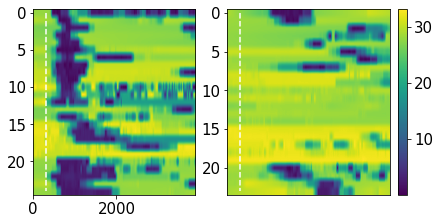

In [309]:
save = True

plt.figure(figsize=[6,3], 
           constrained_layout=True)

plt.subplot(1,2,1)
plt.imshow(CryMatrix, aspect='auto', cmap='viridis')
plt.vlines(PreTime,0,24, 'w', linestyle = '--')

plt.subplot(1,2,2)

plt.imshow(USVMatrix, aspect='auto', cmap='viridis')
plt.vlines(PreTime,0,23, 'w', linestyle = '--')
cbar=plt.colorbar()

plt.xticks([],[])


if save:
    save_dir = '/n/hoekstra_lab_tier1/Users/njourjine/manuscript/figures/figure_3/'
    save_name = 'distance_heatmap.svg'
    plt.savefig(os.path.join(save_dir,save_name), bbox_inches = 'tight')
    
    

#plt.savefig(f'C:/Users/jisan/Documents/Data/Playbacks/Figures/DistanceToSpeakerPerTRialPerType.pdf')#, bbox_inches='tight',  dpi=300, pad_inches=0.1)


In [336]:
np.shape(USVMatrix)

(24, 3900)

In [338]:
np.shape(CryMatrix)

(25, 3900)